In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer = pd.read_csv('Telco_customer_churn.csv')

basic review of the data and check the shape 

In [4]:
customer.describe()
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
customer.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
customer.duplicated().sum()

0

based oint he above two preompts we can see taht their is no null values and their is no duplicate values. this mean the data is already failry clean and we can moveon. 

we nw need to check the dat atypes opf each column, most of the are objecvt or inteeger. soem of the objects hopwver can be turned into boolean values to make analysis faster and more efficeint. 

In [7]:
binary_cols = [
    'Partner', 
    'Dependents',
    'Phone Service',
    'Paperless Billing',
]

for col in binary_cols:
    customer[col] = customer[col].map({'Yes': 1, 'No': 0})

In [8]:
customer.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
#
customer = pd.get_dummies(customer, columns=['Contract','Payment Method'])

features 
- tenure group 
- average montly spend 
- service count 

In [10]:
# tenure ghrouping with 5 differnt bins


bins = [0, 12, 24, 48, 100]
labels = ['0-12 Month', '13-24 Month', '25-48 Month', '49+ Month']

customer['Tenure_Group'] = pd.cut(customer['Tenure Months'], bins=bins, labels=labels, right=False)

In [11]:
# chrun rate based on tenure group

tenure_churn = (
    customer.groupby('Tenure_Group')['Churn Value'].agg(['count', 'sum', 'mean']).reset_index()
)

tenure_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers', 'mean': 'Churn Rate'}, inplace=True)

C:\Users\Maison R\AppData\Local\Temp\ipykernel_120996\2715629105.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer.groupby('Tenure_Group')['Churn Value'].agg(['count', 'sum', 'mean']).reset_index()


In [12]:
print(tenure_churn)

  Tenure_Group  Total Customers  Churned Customers  Churn Rate
0   0-12 Month             2069                999    0.482842
1  13-24 Month             1047                309    0.295129
2  25-48 Month             1624                339    0.208744
3    49+ Month             2303                222    0.096396


In [13]:
#abverage montly spend 

monthly_spend = customer['Monthly Charges'].mean()
print(f'Average Monthly Spend: ${monthly_spend:.2f}')

Average Monthly Spend: $64.76


In [14]:
customer['toal_charges'] = pd.to_numeric(customer['Total Charges'], errors='coerce')

In [15]:
total_spend = customer['toal_charges'].mean()
print(f'Average Total Spend: ${total_spend:.2f}')

Average Total Spend: $2283.30


In [16]:
#service count - hpw many services ais the custoemr using 

service_cols = ['Phone Service', 
                'Multiple Lines', 
                'Internet Service',
                'Online Security', 
                'Online Backup', 
                'Device Protection', 
                'Tech Support', 
                'Streaming TV', 
                'Streaming Movies']

customer['Service_Count'] = customer[service_cols].apply(lambda x: sum(x== 'Yes'), axis=1)

print(customer[['Service_Count']])

      Service_Count
0                 2
1                 0
2                 4
3                 5
4                 5
...             ...
7038              0
7039              6
7040              5
7041              1
7042              5

[7043 rows x 1 columns]


EDA 
- what percentage of customers churen 
- does the shurn increase with shorter tenure 
- what type of contracts have high churn rates
- does the monthly chrges inmpoact chrun rate 


visuals 
- churn rate by contract type 
- tenure vs chrun 
- monthly chrges dusturbuytion 
- churn by service combination 


KPI creation 
- churn rate 
- retention rate 
- averghe revenure per customer 
- chuirn by segment 
- customer lifetime value 

then make dashbvaord  

In [17]:
overall_churn_rate = customer['Churn Value'].mean() 
print(f'Overall Churn Rate: {overall_churn_rate:.2%}')

Overall Churn Rate: 26.54%


In [18]:
#cchurn rate vs tenure rate 
bins = [0, 1, 2,3,4,5,6,7,8,9,10,11,12]
labels = ['less than 1 Month', '2 months', '3 months', '4 months', '5 months', '6 months', '7 months', '8 months', 
          '9 months', '10 months', '11 months', '12 months']

customer['Tenure_Monthly'] = pd.cut(customer['Tenure Months'], bins=bins, labels=labels, right=False)
tenure_churn_monthly = (
    customer.groupby('Tenure_Monthly')['Churn Value'].agg(['count', 'sum', 'mean']).reset_index()
)

tenure_churn_monthly.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers', 'mean': 'Churn Rate'}, inplace=True)

print(tenure_churn_monthly)

       Tenure_Monthly  Total Customers  Churned Customers  Churn Rate
0   less than 1 Month               11                  0    0.000000
1            2 months              613                380    0.619902
2            3 months              238                123    0.516807
3            4 months              200                 94    0.470000
4            5 months              176                 83    0.471591
5            6 months              133                 64    0.481203
6            7 months              110                 40    0.363636
7            8 months              131                 51    0.389313
8            9 months              123                 42    0.341463
9           10 months              119                 46    0.386555
10          11 months              116                 45    0.387931
11          12 months               99                 31    0.313131


C:\Users\Maison R\AppData\Local\Temp\ipykernel_120996\2790888879.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer.groupby('Tenure_Monthly')['Churn Value'].agg(['count', 'sum', 'mean']).reset_index()


In [19]:
#does churn increase with shorter terms
tenure_churn = customer.groupby('Tenure_Group')['Churn Value'].mean().reset_index()
tenure_churn.rename(columns={'Churn Value':'Churn_Rate'}, inplace=True)
print(tenure_churn)

  Tenure_Group  Churn_Rate
0   0-12 Month    0.482842
1  13-24 Month    0.295129
2  25-48 Month    0.208744
3    49+ Month    0.096396


C:\Users\Maison R\AppData\Local\Temp\ipykernel_120996\1223702739.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = customer.groupby('Tenure_Group')['Churn Value'].mean().reset_index()


In [20]:
customer.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure_Group,toal_charges,Service_Count,Tenure_Monthly
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,False,True,0-12 Month,108.15,2,3 months
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,False,False,False,False,True,False,0-12 Month,151.65,0,3 months
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,False,False,False,False,True,False,0-12 Month,820.50,4,9 months
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,False,False,False,False,True,False,25-48 Month,3046.05,5,NaN
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,False,False,True,False,False,False,49+ Month,5036.30,5,NaN


In [21]:
# contract type vs churn 
contract_cols = ['Contract_One year','Contract_Two year','Contract_Month-to-month']
churn_rates = {}

for col in contract_cols:
    rate = customer[customer[col] == 1]['Churn Value'].mean()
    churn_rates[col] = rate

# Convert to DataFrame for easy viewing
contract_churn = pd.DataFrame.from_dict(churn_rates, orient='index', columns=['Churn_Rate'])
contract_churn


#contract_type = customer.groupby(['Contract_One year','Contract_Two year', 'Contract_Month-to-month'])['Churn Value'].mean()
#contract_type.rename(columns={'One year contract': 'Churn_Rate', 'Two year contract': 'Churn_Rate', 'Month-to-month contract': 'Churn_Rate'}, inplace=True)

,Churn_Rate
Contract_One year,0.112695
Contract_Two year,0.028319
Contract_Month-to-month,0.427097


In [22]:
# does churn relate to high monthly charges

corr = customer[['Monthly Charges', 'Churn Value']].corr().loc['Monthly Charges', 'Churn Value']
print(f"Correlation between Monthly Charges and Churn: {corr:.2f}")

Correlation between Monthly Charges and Churn: 0.19


In [23]:
service_cols = [
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies'
]

# Convert Yes/No to 1/0 temporarily if not done
for col in service_cols:
    customer[col+'_Flag'] = customer[col].map({'Yes':1, 'No':0, 'No internet service':0})

service_corr = customer[[c+'_Flag' for c in service_cols] + ['Churn Value']].corr()['Churn Value'].sort_values(ascending=False)
print(service_corr)

Churn Value               1.000000
Streaming TV_Flag         0.063228
Streaming Movies_Flag     0.061382
Device Protection_Flag   -0.066160
Online Backup_Flag       -0.082255
Tech Support_Flag        -0.164674
Online Security_Flag     -0.171226
Name: Churn Value, dtype: float64


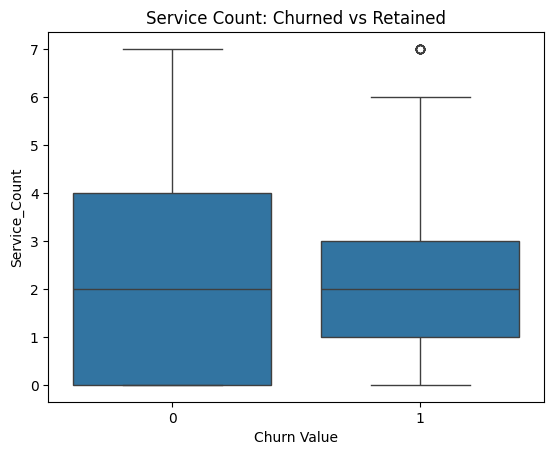

In [24]:
sns.boxplot(x='Churn Value', y='Service_Count', data=customer)
plt.title("Service Count: Churned vs Retained")
plt.show()

In [25]:
# retention rate 

retention_rate = (1 - customer['Churn Value'].mean()) * 100
print(f'Retention Rate: {retention_rate:.2f}%')

Retention Rate: 73.46%


In [ ]:
# average revenue per customer
arpu = customer['Monthly Charges'].mean()
print(f'Average Revenue Per User (ARPU): ${arpu:.2f}')

Average Revenue Per User (ARPU): $64.76


In [27]:
#chrun rate by segments 

churn_by_tenure = customer.groupby('Tenure_Group')['Churn Value'].mean().reset_index()
churn_by_tenure.rename(columns={'Churn Value':'Churn_Rate'}, inplace=True)
print(churn_by_tenure)

  Tenure_Group  Churn_Rate
0   0-12 Month    0.482842
1  13-24 Month    0.295129
2  25-48 Month    0.208744
3    49+ Month    0.096396


C:\Users\Maison R\AppData\Local\Temp\ipykernel_120996\3978851144.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = customer.groupby('Tenure_Group')['Churn Value'].mean().reset_index()


In [28]:
#churn by srervice 

chur_by_service = (customer.groupby('Service_Count')['Churn Value'].mean().reset_index())
print(chur_by_service)

   Service_Count  Churn Value
0              0     0.207558
1              1     0.344560
2              2     0.377220
3              3     0.312883
4              4     0.257235
5              5     0.217452
6              6     0.116667
7              7     0.052885


In [29]:
#customer life time value 

avg_tenure = customer['Tenure Months'].mean()
monthlyu_arpu = customer['Monthly Charges'].mean()
cltv = avg_tenure * monthlyu_arpu
print(f'Customer Lifetime Value (CLTV): ${cltv:.2f}')

Customer Lifetime Value (CLTV): $2096.41


In [30]:
#customer life tiome value by tenure months 

clv_by_tenure = customer.groupby('Tenure_Group').agg( AVG_tenure =('Tenure Months', 'mean'),
                                                     AVG_monthly_charges = ('Monthly Charges', 'mean'),)
clv_by_tenure['Estimated_CLV'] = clv_by_tenure['AVG_tenure'] * clv_by_tenure['AVG_monthly_charges']
print(clv_by_tenure)

              AVG_tenure  AVG_monthly_charges  Estimated_CLV
Tenure_Group                                                
0-12 Month      4.320445            56.056017     242.186921
13-24 Month    17.134670            60.853295    1042.701160
25-48 Month    35.020320            65.727894    2301.811897
49+ Month      62.630482            73.678333    4614.509483


C:\Users\Maison R\AppData\Local\Temp\ipykernel_120996\2570408434.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_by_tenure = customer.groupby('Tenure_Group').agg( AVG_tenure =('Tenure Months', 'mean'),


In [31]:
customer.to_csv('customer_cleaned_data.csv', index=False)